### **Random Kitchen Sink Algorithm:**
Random Kitchen sink algorithm provides a very efficient method for explicitly mapping linearly non-separable data into appropriate higher dimensional   space where it is linearly separable.

The motivation for this method is that, for large complex data sets, number of support vectors is of the order of 20% to 40% of training data points and kernel methods become very slow during both training and testing. RKS provide a way to overcome this difficulty.

One of the kernel function used in SVM based classification  is  gaussian kernel given by  :   


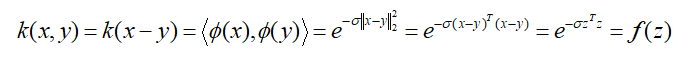

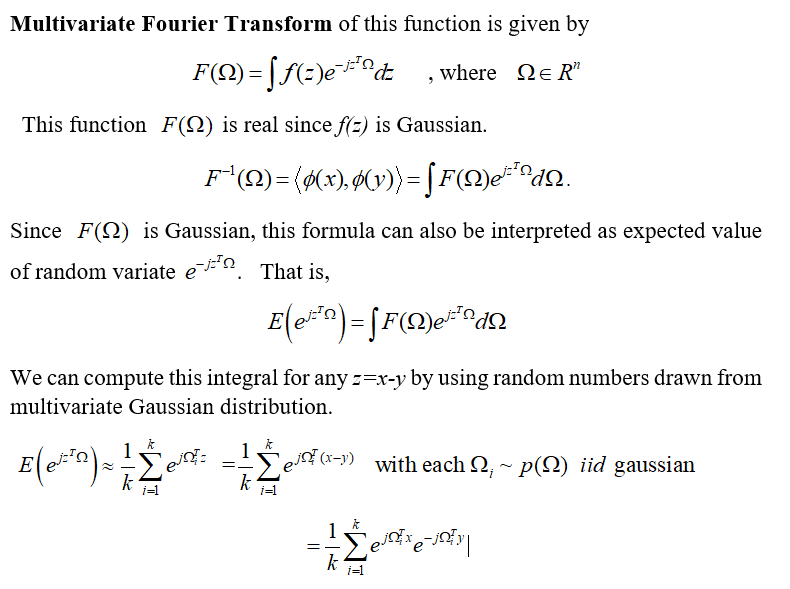

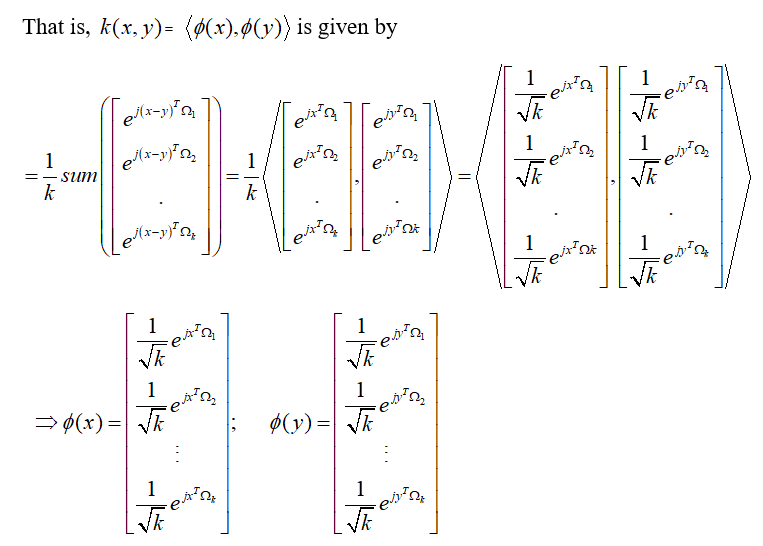

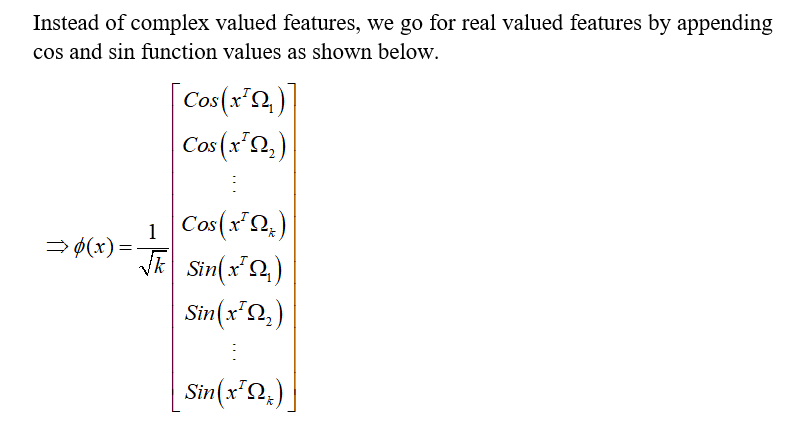

In [ ]:
# importing the necessary libraries
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split   
import numpy as np   
from sklearn.metrics import accuracy_score

## **RKS for Linear Data (3 Classes)**

In [ ]:
# LOAD THE DATA

iris = load_iris()
features = pd.DataFrame(iris.data)
print(features.head())
print(features.shape)
print(iris.feature_names)
target=iris.target
tar=pd.DataFrame(target)
data = pd.DataFrame(iris.data)
tar.columns =['Target']
extracted = tar['Target']
data = data.join(extracted)
data

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,0,1,2,3,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data0= data.loc[data['Target'] == 0]
data1= data.loc[data['Target'] == 1]
data2= data.loc[data['Target'] == 2]
data00=data0.loc[0:10,:]
data11=data1.loc[50:60,:]
data22=data2.loc[100:110,:]
D=pd.DataFrame()
D = D.append([data00,data11,data22])
D=D.reset_index(drop=True)

y = D['Target'].values
D.drop(['Target'], axis='columns', inplace=True)
x=D

In [ ]:
scaler = StandardScaler()
X_scaledL = scaler.fit_transform(x)
X_scaleddf=pd.DataFrame(X_scaledL)

# RANDOM MATRIX
rand_num = np.random.normal(0,1,[4,64])
print(rand_num.shape)

rk_data=np.matmul(X_scaledL,rand_num)  
rks_data=np.hstack((np.cos(rk_data),np.sin(rk_data)))
rks_data.shape

(4, 64)


(33, 128)

In [ ]:
#Split the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(rks_data, y, test_size= 0.30, random_state=42,stratify=y)

df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

print('Train set shape:',X_train.shape)
print('Test set shape:',X_test.shape)

mlb = LabelBinarizer()
y_train  = mlb.fit_transform(y_train)
y_test   = mlb.fit_transform(y_test)

In Training Split:
1    8
0    8
2    7
Name: 0, dtype: int64

In Testing Split:
2    4
0    3
1    3
Name: 0, dtype: int64
Train set shape: (23, 128)
Test set shape: (10, 128)


### **REGULARISED LEAST SQUARE**


image.png

In [ ]:
def model(X_train,X_test,y_train,y_test,n):
  I=np.identity(n)
  weight=[]

  for i in range(1,100):
    w=np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)+i*I),X_train.T),y_train)
    weight.append(w)

  trainaccuracy=[]
  testaccuracy=[]

  for i in range(len(weight)):
    y_pred=(np.matmul(X_train,weight[i]))
    
    y_predd = (pd.DataFrame(y_pred)).apply(lambda x: x.argmax(), axis=1)
    y_trainn=(pd.DataFrame(y_train)).apply(lambda x: x.argmax(), axis=1)

    ytest_pred=np.matmul(X_test,weight[i])
    y_testpred=(pd.DataFrame(ytest_pred)).apply(lambda x: x.argmax(), axis=1)
    y_test_=(pd.DataFrame(y_test)).apply(lambda x: x.argmax(), axis=1)
    
    acc=accuracy_score(y_predd,y_trainn)
    trainaccuracy.append(acc)

    acctest=accuracy_score(y_testpred,y_test_)
    testaccuracy.append(acctest)

    return weight,trainaccuracy,testaccuracy

In [ ]:
weights,trainaccuracy,testaccuracy = model(X_train,X_test,y_train,y_test,128)  
print('Train Accuracy',trainaccuracy)
print('Test Accuracy',testaccuracy)

Train Accuracy [1.0]
Test Accuracy [1.0]


## **RKS for non-linearly separable Data(Binary Class)**

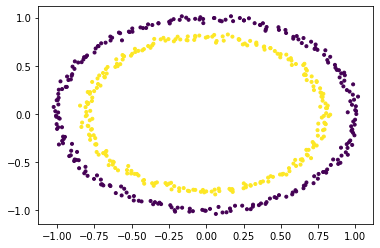

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
  
# generating data
X, Y = make_circles(n_samples = 500, noise = 0.02)
  
# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.')
plt.show()

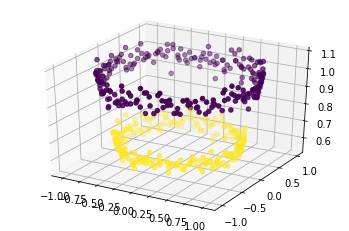

In [ ]:

# adding a new dimension to X
X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))
X3 = (X1**2 + X2**2)
#X = np.hstack((X, X3))
  
# visualizing data in higher dimension
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
plt.show()

In [ ]:
from math import *

nd=100
angle=[]
radius=[]
x=[]
y=[]
for j in range(0,nd):
  angle1 = j * (pi/16)
  angle.append(angle1)
  radius1 = 6.5*(104-j)/104
  radius.append(radius1)
  x1 = radius1*sin(angle1) 
  x.append(x1)
  y1 = radius1*cos(angle1);
  y.append(y1)

x1 = np.transpose(x)
y1 = np.transpose(y)   
x2 = -x1
y2 = -y1

d1=np.ones((nd));        
d2=-d1 

df1={'x':x1,'y':y1,'class':d1}
df2={'x':x2,'y':y2,'class':d2}
import pandas as pd
A1=pd.DataFrame(data=df1)
A2=pd.DataFrame(data=df2)
A=A1.append(A2)

In [ ]:
y = A['class'].values
A.drop(['class'], axis='columns', inplace=True)
x=A

In [ ]:
scaler = StandardScaler()
X_scaledR = scaler.fit_transform(x)
X_scaleddf=pd.DataFrame(X_scaledR)

In [ ]:
rand_num = np.random.normal(0,1,[2,64])
print(rand_num.shape)

rks_data=np.matmul(X_scaledR,rand_num)  
rks_data=np.hstack((np.cos(rks_data),np.sin(rks_data)))
rks_data.shape

(2, 64)


(200, 128)

In [ ]:
#Split the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(rks_data, y, test_size= 0.30, random_state=42,stratify=y)

df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

print('Train set shape:',X_train.shape)
print('Test set shape:',X_test.shape)

In Training Split:
-1.0    70
 1.0    70
Name: 0, dtype: int64

In Testing Split:
 1.0    30
-1.0    30
Name: 0, dtype: int64
Train set shape: (140, 128)
Test set shape: (60, 128)


In [ ]:
weights,trainaccuracy,testaccuracy = model(X_train,X_test,y_train,y_test,128)  
print('Train Accuracy',trainaccuracy)
print('Test Accuracy',testaccuracy)

Train Accuracy [1.0]
Test Accuracy [1.0]


### **RKS REALTIME DATA**

In [ ]:
Data = pd.read_csv("/content/drive/MyDrive/oasis_longitudinal.csv")     # using pandas read_csv function to load dataset 
print(Data.head()) 

pdData = Data.copy()     # making a copy of the dataset
print('\033[1mThe Dementia dataset having "{0}" rows and "{1}" columns\033[0m.'.format(pdData.shape[0],pdData.shape[1]))  

# Converting Categorical Data to Numerical Data
pdData['M/F'] = pdData['M/F'].replace(['M', 'F'], [1,0])
pdData['Group'] = [-1 if each == "Demented" or each == "Converted" else 1 for each in pdData['Group']]

# checking missing values in dataset for each attributes / columns 
print("\033[1m Column_Name       No_of_Missing_Values")
print("*"*50)
print("\033[0m{0}".format(pdData.isnull().sum()))
print("\033[1m*"*50)

# checking if any duplicate rows available in the dataset
print("Showing Duplicate rows if any in the dataset: ")
print("\033[0m{0}".format(pdData[pdData.duplicated()]))
print("\033[0m")

# filling the missing values with median value of the feature
median = pdData['MMSE'].median()
pdData['MMSE'].fillna(median, inplace=True)

median = pdData['SES'].median()
pdData['SES'].fillna(median, inplace=True)
pdData.isnull().sum()

# X contains features & y contains the target class
X = pdData[['Visit','MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV','CDR', 'nWBV', 'ASF']].values
y = pdData['Group'].values
DATA=pd.DataFrame(X)

# X contains features & y contains the target class
X = pdData[[ 'M/F', 'Age', 'EDUC','MMSE', 'eTIV','CDR', 'nWBV', 'ASF']].values
y = pdData['Group'].values

  Subject ID         MRI ID        Group  Visit  ...  CDR  eTIV   nWBV    ASF
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1  ...  0.0  1987  0.696  0.883
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2  ...  0.0  2004  0.681  0.876
2  OAS2_0002  OAS2_0002_MR1     Demented      1  ...  0.5  1678  0.736  1.046
3  OAS2_0002  OAS2_0002_MR2     Demented      2  ...  0.5  1738  0.713  1.010
4  OAS2_0002  OAS2_0002_MR3     Demented      3  ...  0.5  1698  0.701  1.034

[5 rows x 15 columns]
The Dementia dataset having "373" rows and "15" columns.
 Column_Name       No_of_Missing_Values
**************************************************
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64
**************************************************
Showing Duplicate rows if any in the datas

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaleddf=pd.DataFrame(X_scaled)


rand_num = np.random.normal(0,1,[8,128])
print(rand_num.shape)

rk_data=np.matmul(X_scaled,rand_num)  
rks_data=np.hstack((np.cos(rk_data),np.sin(rk_data)))
rks_data.shape

(8, 128)


(373, 256)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rks_data, y, test_size= 0.30, random_state=42,stratify=y)

df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

print('Train set shape:',X_train.shape)
print('Test set shape:',X_test.shape)

In Training Split:
 1    133
-1    128
Name: 0, dtype: int64

In Testing Split:
 1    57
-1    55
Name: 0, dtype: int64
Train set shape: (261, 256)
Test set shape: (112, 256)


In [ ]:
weights,trainaccuracy,testaccuracy = model(X_train,X_test,y_train,y_test,256)  
print('Train Accuracy',trainaccuracy)
print('Test Accuracy',testaccuracy)

Train Accuracy [1.0]
Test Accuracy [1.0]


## **SVM RBF INBUILT**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.30, random_state=42,stratify=y)

df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

print('Train set shape:',X_train.shape)
print('Test set shape:',X_test.shape)

In Training Split:
 1    133
-1    128
Name: 0, dtype: int64

In Testing Split:
 1    57
-1    55
Name: 0, dtype: int64
Train set shape: (261, 8)
Test set shape: (112, 8)


In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,roc_curve,auc,average_precision_score
import matplotlib.pyplot as plt 
import seaborn as sns  

def plot_confusion_matrix(y_test, yhat):
    cm = confusion_matrix(y_test, yhat)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap=plt.cm.Blues, cbar=False);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix', size=8); 
    ax.xaxis.set_ticklabels(['Nondemented', 'Demented']); ax.yaxis.set_ticklabels(['Nondemented', 'Demented'])

In [ ]:
# SVM
def svm(X_tr,Y_tr,X_te,Y_te):
  # Normally, C = 1 and gamma = 'scale' are default values
  # C controls how wide the margin will be with respect to how many misclassification we are allowing
  # C is increasing --> reduce the size of the margin and fewer misclassification and vice versa
  param_grid = [
      {'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 80, 100],
      'gamma': ['scale', 0.5, 0.125, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
      'kernel': ['rbf']},
  ]

  optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv=10, #  taking 10-fold as in k-fold cross validation
                              scoring='accuracy', 
                              verbose=0,
                              n_jobs=-1)

  optimal_params.fit(X_train, y_train)
  print(optimal_params.best_params_)

  #svm
  C = optimal_params.best_params_['C']
  gamma = optimal_params.best_params_['gamma']
  kernel = optimal_params.best_params_['kernel']

  svm = SVC(C=C, gamma=gamma, kernel=kernel)
  svm.fit(X_tr,Y_tr)

  # predict the response
  svm_y_pred = svm.predict(X_te)

  # Confusion Matrix for the Support Vector Machine Model
  plot_confusion_matrix(Y_te,svm_y_pred)

  # Classification Report for the Support Vector Machine Model
  print("Classification Report : Support Vector Machine")
  classRep = classification_report(Y_te, svm_y_pred, digits=2)
  print(classRep)

{'C': 4, 'gamma': 0.5, 'kernel': 'rbf'}
Classification Report : Support Vector Machine
              precision    recall  f1-score   support

          -1       0.98      0.93      0.95        55
           1       0.93      0.98      0.96        57

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112



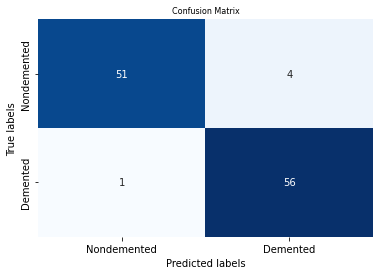

In [ ]:
svm(X_train, y_train,X_test,y_test)

In [ ]:
refer https://github.com/kilinco/svm_cvx/blob/master/Code/svmPredict.m

### **SVM - RBF (non-linearly separable data)**


In [ ]:
#@title
import cmath
import random
import warnings
import cvxpy as cp
from cvxopt import matrix as cvxopt_matrix
from scipy.optimize import fsolve as fs
warnings.filterwarnings('ignore')


m=x.shape[0]
n=x.shape[1]

# creating RBF gram matrix

# creating random matrix

random.seed(12345)
random_num = np.random.normal(0,1,[n,m])
data1 = np.matmul(np.array(x),random_num)
data1=pd.DataFrame(data1).astype(float)


for i in range(len(data1)):
  for j in range(len(data1)):
    data1[i][j]= cmath.exp(complex(data1[i][j]))

features = np.matmul(data1,data1.T)
m1,n1 = features.shape

Q =(np.matmul(y,y.T))*features

e=np.ones([m1,1])

#def lagr(u):
  #return((0.5 * np.matmul(np.matmul(u.T , Q) , u)) -(np.matmul(e.T, u)))

#fs(lagr,np.zeros([200,1]))
#b= cp.multiply(-1, u)
#s= u.T @ Q
#s= s @ u
#objective = cp.Minimize(cp.real(cp.sum((0.5 *s) + b )))
#constraints = [u.T*y==0, u>=0]
#prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
#result = prob.solve()

# The optimal value for x is stored in `x.value`.
#print(u.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
#print(constraints[0].dual_value)


In [ ]:
def radial_kernel(data1, data2):
    gamma = 0.5
    return np.exp(-gamma * np.linalg.norm(data1 - data2)**2)


def lagrangian_multiplier(X,Y,kernel,learning_rate,Iterations):
    m = len(X)
    lamda = np.zeros(m)
    K = np.zeros((m, m))           
    for i in range(m):
        for j in range(m):
            K[i,j] = kernel(X[i], X[j])
    for _ in range(Iterations):
        for i in range(len(X)):
            result = 0
            temp = 0
            for j in range(len(X)):
                temp= lamda[j] * Y[j] * K[i,j]
                result = result + temp 
            temp = np.sign(result)
            if temp != Y[i]:
                lamda[i] = lamda[i] + learning_rate
    return lamda

def Predictions(X_train,Y_train,X_test,lamda,kernel):
    m = len(X_test)
    predict = []
    for i in range(m):
        result = 0
        for a, x_train,y_train  in zip(lamda, X_train,Y_train):
            result += a * y_train * kernel(X_test[i],x_train)
        result = np.sign(result)
        predict.append(result)
    return predict

## **SVM - RBF (non-linearly separable data)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaledR, y, test_size= 0.30, random_state=42,stratify=y)

df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

print('Train set shape:',X_train.shape)
print('Test set shape:',X_test.shape)

In Training Split:
-1.0    70
 1.0    70
Name: 0, dtype: int64

In Testing Split:
 1.0    30
-1.0    30
Name: 0, dtype: int64
Train set shape: (140, 2)
Test set shape: (60, 2)


In [ ]:
lamda2=lagrangian_multiplier(X_train,y_train,radial_kernel,1,1000)

In [ ]:
prediction2 = Predictions(X_train,y_train,X_test,lamda2,radial_kernel)

In [ ]:
accuracy_score(prediction2,y_test)

0.5166666666666667

### **RBF - Linear Data**

In [ ]:
data00=data0.loc[0:49,:]
data11=data1.loc[50:99,:]
DR=pd.DataFrame()
DR = DR.append([data00,data11])
DR=DR.reset_index(drop=True)
y = DR['Target'].values
DR.drop(['Target'], axis='columns', inplace=True)
x=DR

scaler = StandardScaler()
X_scaledi = scaler.fit_transform(x)
X_scaleddf=pd.DataFrame(X_scaledi)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaledi, y, test_size= 0.30, random_state=42,stratify=y)

df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

print('Train set shape:',X_train.shape)
print('Test set shape:',X_test.shape)

In Training Split:
1    35
0    35
Name: 0, dtype: int64

In Testing Split:
0    15
1    15
Name: 0, dtype: int64
Train set shape: (70, 4)
Test set shape: (30, 4)


In [ ]:
lamda2=lagrangian_multiplier(X_train,y_train,radial_kernel,1,1000)
prediction2 = Predictions(X_train,y_train,X_test,lamda2,radial_kernel)
accuracy_score(prediction2,y_test)

0.5